In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import functions as fa

# **Config**

In [2]:
sns.set_theme(style="darkgrid")
title_data = 'Steel foundry'
paleta = sns.color_palette("tab10").as_hex()

# **Data**
---

**Data Description**

Contains information about the active and reactive power generated to create Arc

- **key** - is used to identify the steel batch number.
- **Arc heating start** - date and time where the intense heat is generated by creating an electric arc, which is a discharge of electric current through a gap in a circuit. arc heating is used to achieve high temperatures for tasks like melting metals or fusing materials.
- **Arc heating end** - date and time where the intense heat is concluded or terminated. This marks the completion of this heat generation phase and often indicates that the process is transitioning to a different stage or task.
- **Active power** - the real power consumed by an electrical system. the active power is the component that contributes to the actual functioning or performance of the system.
- **Reactive power** - the power that oscillates back and forth between the source and the load in an alternating current (AC) electrical system. it is required to establish and maintain the electromagnetic fields in devices like motors, transformers, and solenoids. a balance between active power and reactive power is necessary to maintain efficiency and reliability.

In [3]:
url_data_steel = 'https://drive.google.com/file/d/1U0EV7OV2LwnV7Cxp5Z68lxRJPvwGGSOH/view?usp=sharing'
url_data_steel = 'https://drive.google.com/uc?id=' + url_data_steel.split('/')[-2]
data_steel= pd.read_csv(url_data_steel, dtype='str')

In [4]:
data_steel.head()

,key,Arc heating start,Arc heating end,Active power,Reactive power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.9760587506,0.6870837212
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.8056070805,0.5202852488
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.7443634272,0.4988054037
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.6593625546000002,1.0626693964
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.6927547454999999,0.4143972397


In [5]:
data_steel[[
    'Active power',
    'Reactive power'
]] = data_steel[[
    'Active power',
    'Reactive power'
]].astype("float64")

data_steel['Arc heating start'] = pd.to_datetime(data_steel['Arc heating start'])
data_steel['Arc heating end'] = pd.to_datetime(data_steel['Arc heating end'])

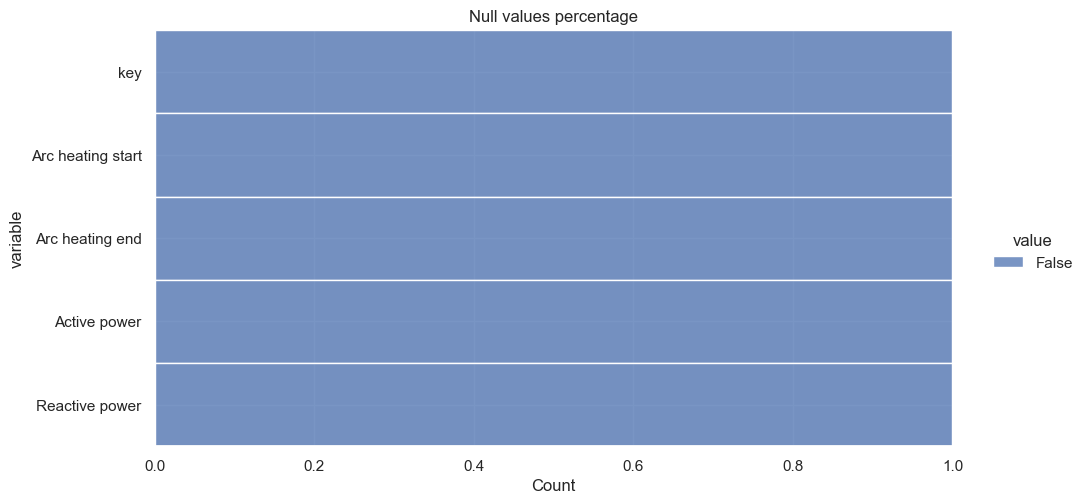

In [6]:
fa.porcentaje_nulos_x_caracteristica(data_steel, title='Null values percentage')

- No se evidencia valores nulos
- *-No null values are evident-*

In [7]:
lotes = len(data_steel['key'].unique())
print(f'Hay {lotes} lotes ')
print(f'-There are {lotes} batches-')

Hay 3214 lotes 
-There are 3214 batches-


In [8]:
data_steel.describe()

,Arc heating start,Arc heating end,Active power,Reactive power
count,14876,14876,14876.000000,14876.000000
mean,2019-07-02 16:15:28.218203904,2019-07-02 16:18:19.889150208,0.670441,0.452592
min,2019-05-03 11:02:14,2019-05-03 11:06:02,0.030002,-715.504924
25%,2019-06-02 07:01:09.249999872,2019-06-02 07:04:21,0.395297,0.290991
50%,2019-06-30 09:57:14.500000,2019-06-30 10:01:01,0.555517,0.415962
75%,2019-08-03 13:04:47.750000128,2019-08-03 13:09:14,0.857034,0.637371
max,2019-09-01 04:34:47,2019-09-01 04:36:08,3.731596,2.676388
std,NaN,NaN,0.408159,5.878702


- Hay un valor negativo
- -There are one value in negative-

- Los datos son más dispersos en la potencia reactiva que en la activa.
- -The data is more dispersed in reactive power than in active power.-



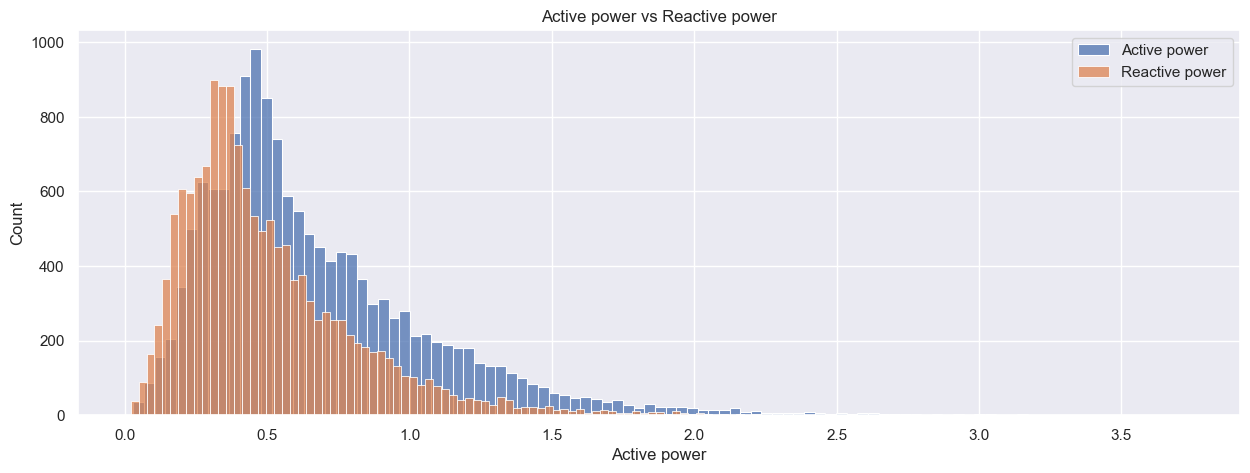

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.histplot(data=data_steel, x='Active power', label='Active power')
ax.set_title('Active power vs Reactive power')
sns.histplot(data=data_steel[data_steel['Reactive power']>0], x='Reactive power', label='Reactive power')
plt.legend()
plt.show()

- Existe una gran concentración de potencia reactiva en las primeras unidades de medida de aproximadamente 0,0 a 0,4. Existe una gran concentración de potencia activa en las primeras unidades de medida de aproximadamente 0,5 a 1,5.
- There is a large concentration of reactive power in the first measurement units of approximately 0.0 to 0.4. There is a large concentration of active power in the first measurement units of approximately 0.5  to 1.5.


- Hay una mayor concentración de la energía activa que la reactiva entre los rangos de 0.0 a 1.5
- -There is a higher concentration in active power than reactive between range 0.0 and 1.5.-


- Ambas distribuciones tiene un sesgo positivo
- -Both distributions have a positive skew-

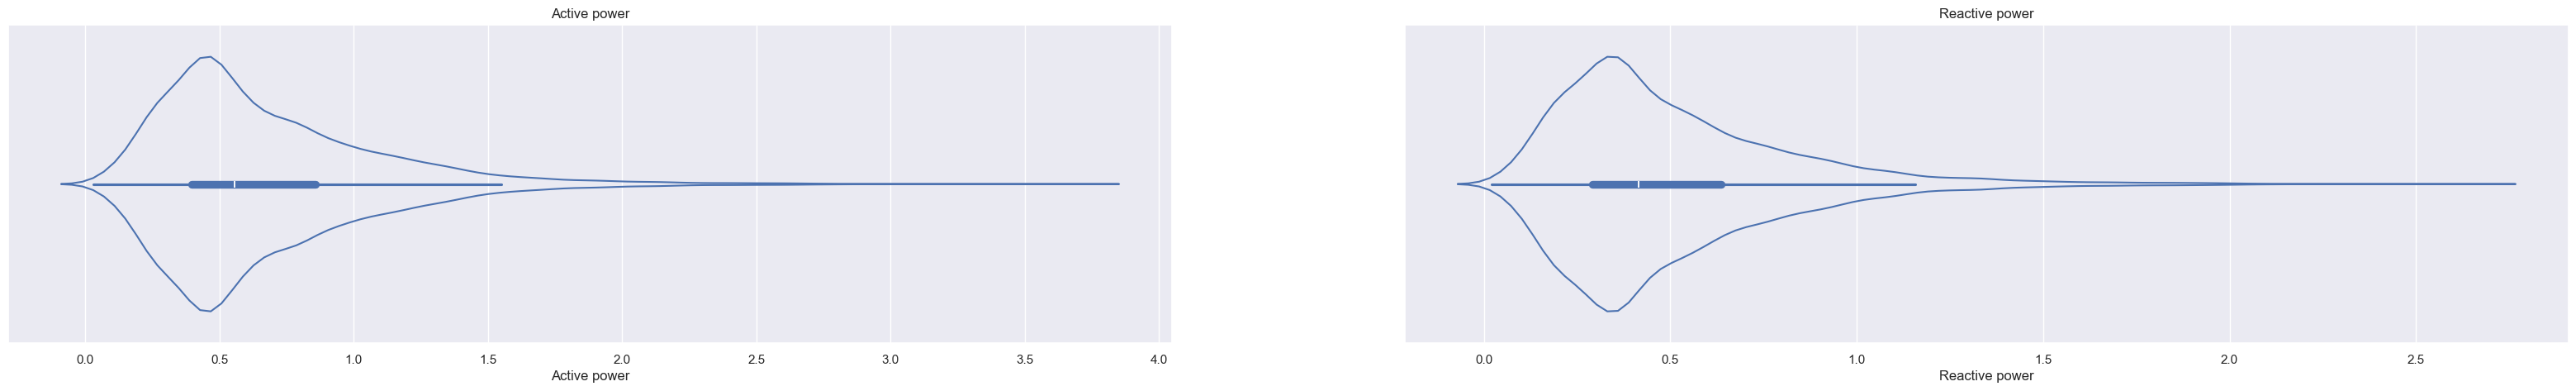

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(40, 5))
sns.violinplot(data=data_steel, x="Active power", fill=False, ax=ax[0])
ax[0].set_title('Active power')
sns.violinplot(data=data_steel[data_steel['Reactive power']>0], x="Reactive power", fill=False, ax=ax[1])
ax[1].set_title('Reactive power')
plt.show()

- No sé muy bien la unidad de medida en que fue registrada los valores de la potencia activa y reactiva, por lo tanto, no me es posible realizar la conversión a kilowats, y no podría ver si la reactiva supera el 50% de la activa, para validar si a esta compañía le cobran la potencia reactiva.
- -I don't know the unit of measurement that records active and reactive power, therefore no can not converted in kilowatts, and  I couldn't see the difference if the power reactive upper the active 50% power.-

In [11]:
data_steel[data_steel['Reactive power']>0].describe()


,Arc heating start,Arc heating end,Active power,Reactive power
count,14875,14875,14875.000000,14875.000000
mean,2019-07-02 16:13:24.187294208,2019-07-02 16:16:15.862453760,0.670453,0.500723
min,2019-05-03 11:02:14,2019-05-03 11:06:02,0.030002,0.020806
25%,2019-06-02 06:55:48.500000,2019-06-02 06:58:59,0.395295,0.291003
50%,2019-06-30 09:54:00,2019-06-30 09:57:15,0.555565,0.415984
75%,2019-08-03 13:06:43.500000,2019-08-03 13:10:21,0.857049,0.637403
max,2019-09-01 04:34:47,2019-09-01 04:36:08,3.731596,2.676388
std,NaN,NaN,0.408170,0.310880


The deviation in Reactive power is for the outliers value

In [14]:
print(data_steel['Arc heating start'].dt.year.unique(),
data_steel['Arc heating end'].dt.year.unique())

[2019] [2019]


In [16]:
print(data_steel['Arc heating start'].dt.month.unique(),
data_steel['Arc heating end'].dt.month.unique())

[5 6 7 8 9] [5 6 7 8 9]


- La data es del 2019 y tiene cinco meses, desde mayo-septiembre
- -*The data is the 2019 and have five month*-

In [17]:
data_steel['start month'] =  data_steel['Arc heating start'].dt.month
data_steel['end month'] =  data_steel['Arc heating start'].dt.month

In [18]:
(data_steel['start month'] == data_steel['end month']).sum(), data_steel.shape

(14876, (14876, 7))

In [19]:
function_dictionary = {
    "Active power": ['sum'],
    "Reactive power": ['sum']
}

filter_feature = [
    'start month',
    'end month'
]

temporal = data_steel.groupby(
    filter_feature
).aggregate(function_dictionary).reset_index()

temporal.columns = ['start month', 'end month', 'Active power', 'Reactive power']
temporal['0.5 Active'] = (temporal['Active power'] * 0.5)

In [20]:
temporal['Active power'] > (temporal['Active power'] * 0.5)

0    True
1    True
2    True
3    True
4    True
Name: Active power, dtype: bool

Para la fundidora de acero por cada mes la energía reactiva es superior al 50% de la energía activa, por lo tanto, es posible que les estén cobrando la energía reactiva, lo que significa un incremento en el cobro de la factura de energía.
- -*For the steel smelting they may them charging  for reactive energy*-


In [21]:
temporal

,start month,end month,Active power,Reactive power,0.5 Active
0,5,5,2429.450804,1780.061910,1214.725402
1,6,6,2653.294985,1964.643513,1326.647493
2,7,7,2248.899856,999.584302,1124.449928
3,8,8,2631.719123,1981.173800,1315.859562
4,9,9,10.122284,7.291083,5.061142


In [22]:
data_temporal = data_steel.copy()
data_temporal["start_date"] = data_steel['Arc heating start'].dt.date

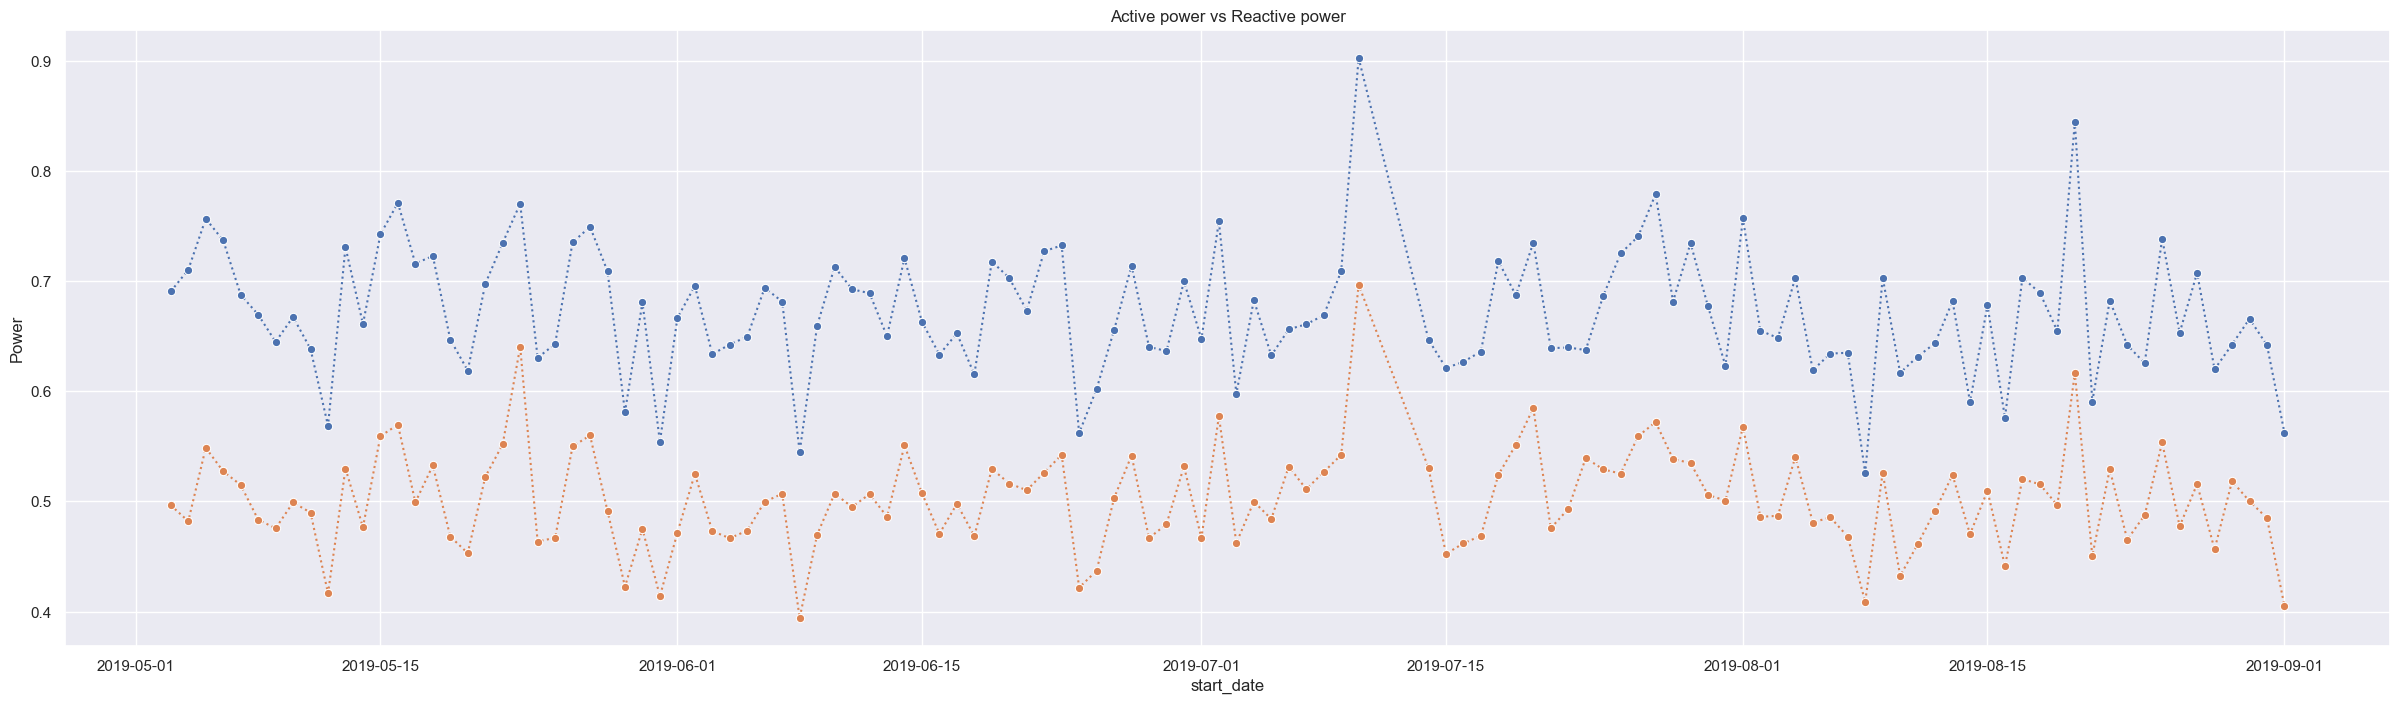

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(30, 8))
sns.lineplot(
    x='start_date', 
    y='Active power', 
    data=data_temporal, 
    linestyle='dotted',
    marker='o',
    errorbar=None)
sns.lineplot(
    x='start_date', 
    y='Reactive power', 
    data=data_temporal[data_temporal['Reactive power']>0], 
    linestyle='dotted',
    marker='o',
    errorbar=None)
ax.set_ylabel('Power')
ax.set_title('Active power vs Reactive power')
plt.show()



- Se evidencia que  en el mes de julio, los 15 primeros días se evidencia un incremento en la energía activa y reactiva.
- -The month of July, the first 15 days, there is an increase in active and reactive energy.-

- En la línea de tiempo la potencia activa y reactiva no muestran una diferencia muy significativa en su forma, sino en la unidad de medida
- -In the timeline the active and reactive power does not show a very significant difference in its form, but in the unit of measurement-